# **FaceNet AI: Demographic Analysis using CNN, Transfer Learning, and Data Augmentation**
---


### 🧑‍💼 **Shuvendu Pritam Das**  
*Data Science / ML Enthusiast*  

- **GitHub:** [SPritamDas](https://github.com/SPritamDas/My-Profile)  
- **LinkedIn:** [Shuvendu Pritam Das](https://www.linkedin.com/in/shuvendupritamdas/)  
- **Email:** shuvendupritamdas181@gmail.com  

---

## **Project Overview**
FaceNet AI is an advanced deep learning solution designed for demographic analysis from facial images. By utilizing state-of-the-art techniques such as Convolutional Neural Networks (CNN), Transfer Learning, and Data Augmentation, this project aims to predict Age, Gender, and Ethnicity from facial data with high accuracy and efficiency. The model is built using the UTKFace Dataset, which consists of over 20,000 facial images, offering a wide range of demographic diversity for training and testing.

## Objectives
1. Age Estimation: Predict a person’s age using facial characteristics.
2. Gender Classification: Classify gender (male or female) based on facial features.
3. Ethnicity Recognition: Identify the ethnicity (White, Black, Asian, etc.) from facial images.

## Concepts and Technology Used
1. Transfer Learning: Leverage pre-trained models (VGG16) for faster training and enhanced accuracy.
2. Data Augmentation: Apply image transformations (rotation, scaling, flipping) to enrich the dataset and reduce overfitting.

## Dataset Information
The UTKFace Dataset is a large-scale dataset comprising over 20,000 facial images. These images span a wide age range (0–116 years) and include annotations for age, gender, and ethnicity. The dataset captures a broad variety of poses, expressions, illumination, and occlusions, making it ideal for training robust facial recognition models.
<br>
<br>
**Dataset Download**: [UTKFace Dataset](https://www.kaggle.com/datasets/jangedoo/utkface-new)


 ##Technical Details
The model architecture combines CNN with Transfer Learning using the VGG16 model, fine-tuned on the UTKFace dataset to predict age, gender and ethnicity.

## ModelArchitecture Highlights:
1. Base Model: VGG16, pre-trained on ImageNet, to extract relevant features from facial images.
2. Fine-Tuning: The top layers of VGG16 are retrained on the UTKFace dataset to adapt the model for the specific task of demographic analysis.
3. Data Augmentation: Techniques like random rotations, flips, and zooms are applied to the training dataset, improving model generalization.
4. Optimizer: Adam optimizer for efficient training.
5. Loss Function: Linear, Binary Cross Entropy and Sparse Categorical Cross-Entropy for  Regression, Binary Classification and Multi-Class classification tasks respectively.

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')

import os
import time
import sys
import datetime
import pickle

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score,r2_score, mean_squared_error, mean_absolute_error, accuracy_score,ConfusionMatrixDisplay
from sklearn import datasets
from imblearn.over_sampling import SMOTE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers, metrics, losses
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adadelta,Adagrad,Adamax,Nadam
from tensorflow.keras.regularizers import l2, l1, l1_l2
from tensorflow.keras.callbacks import LearningRateScheduler, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory, plot_model, to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions
from tensorflow.keras.metrics import mae,mse, Accuracy, R2Score
from tensorflow.keras.losses import BinaryCrossentropy, MeanAbsoluteError, SparseCategoricalCrossentropy


In [ ]:
tf.config.run_functions_eagerly(True)
# The command tf.config.run_functions_eagerly(True) in TensorFlow is used to enable eager execution for all functions, which means that operations will be executed immediately as they are called, without building a computational graph. Eager execution is particularly useful for debugging, as it allows you to inspect intermediate values of tensors and see the results of operations step by step.

# Data Set Import

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d jangedoo/utkface-new

Dataset URL: https://www.kaggle.com/datasets/jangedoo/utkface-new
License(s): copyright-authors
utkface-new.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/utkface-new.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

# Creating Required Dataset

In [ ]:
age = []
gender = []
ethnicity = []
img_path = []

for file in os.listdir('/content/UTKFace'):
  age.append(file.split('_')[0])
  gender.append(file.split('_')[1])
  ethnicity.append(file.split('_')[2])
  img_path.append(file)

In [ ]:
len(age), len(gender), len(ethnicity), len(img_path)

(23708, 23708, 23708, 23708)

In [ ]:
df = pd.DataFrame({'age':age, 'gender':gender, 'ethnicity':ethnicity, 'img_path':img_path})
df.head()

,age,gender,ethnicity,img_path
0,40,1,0,40_1_0_20170117181413925.jpg.chip.jpg
1,23,1,2,23_1_2_20170116173017785.jpg.chip.jpg
2,19,1,1,19_1_1_20170117124021486.jpg.chip.jpg
3,26,1,0,26_1_0_20170116220807186.jpg.chip.jpg
4,54,0,0,54_0_0_20170113210319475.jpg.chip.jpg


Only 3 wrong entries are there in ethinicity.

# Removing Wrongly entered Data

In [ ]:
df = df[df['ethnicity'].isin(['0', '1', '2', '3', '4', '5', '6', '7'])]

In [ ]:
df.shape

(23705, 4)

# Null Value

In [ ]:
df.isnull().sum()

,0
age,0
gender,0
ethnicity,0
img_path,0


# Duplicate Value

In [ ]:
df.duplicated().sum()

0

# EDA

In [ ]:
df['age'] = df['age'].astype(int)
df['gender'] = df['gender'].astype(int)
df['ethnicity'] = df['ethnicity'].astype(int)

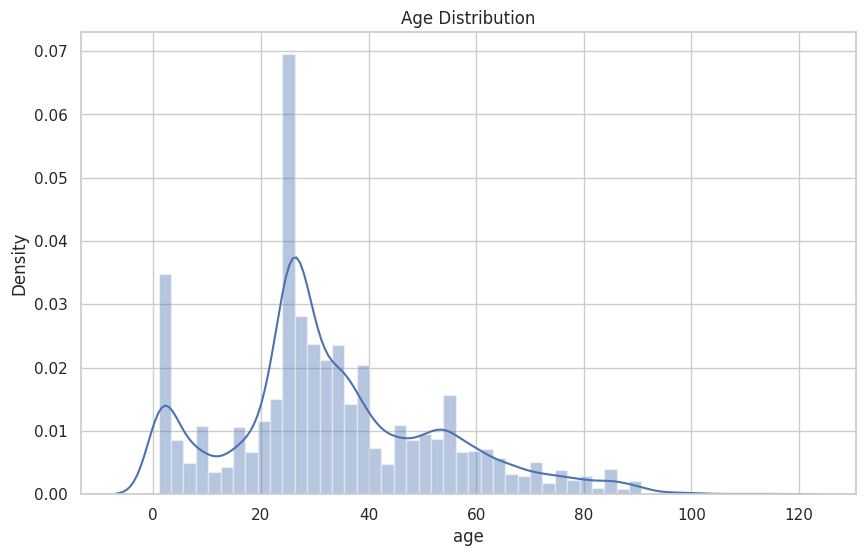

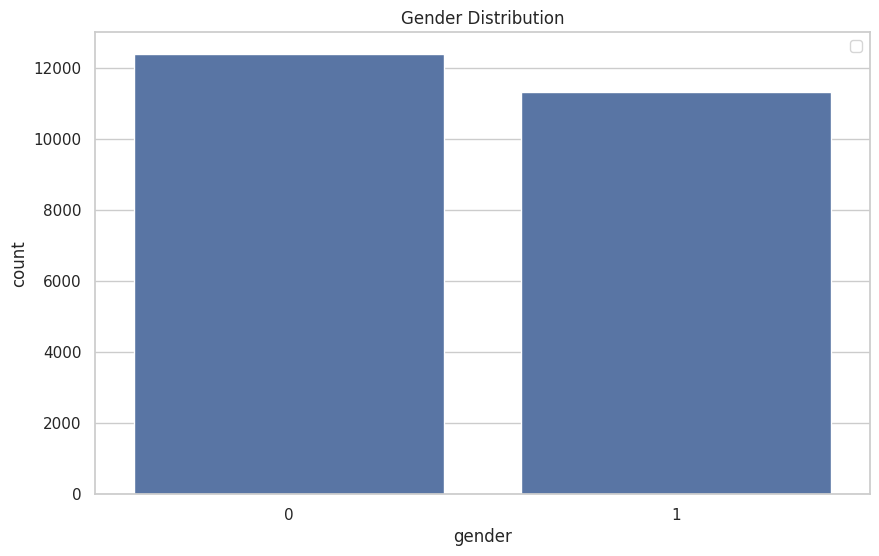

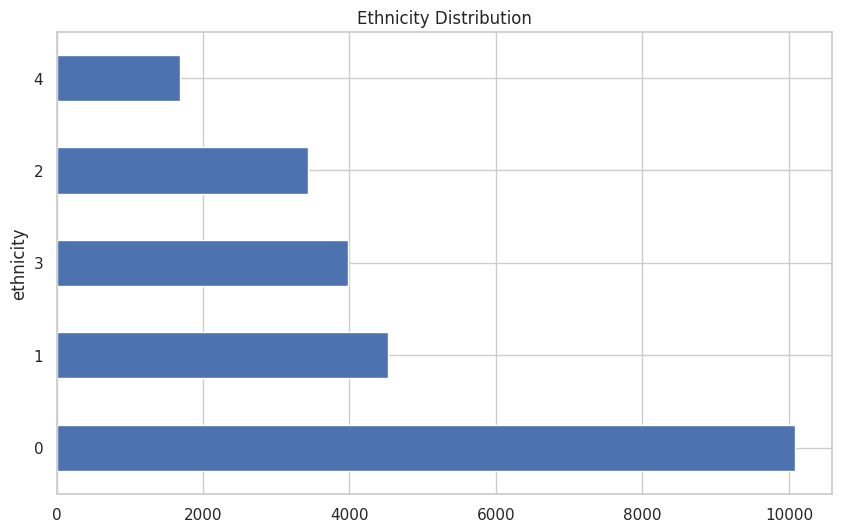

In [ ]:
plt.figure(figsize = (10,6))
sns.distplot(df['age'],kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize = (10,6))
sns.barplot(df['gender'].value_counts())
plt.legend()
plt.title('Gender Distribution')
plt.show()

plt.figure(figsize = (10,6))
df['ethnicity'].value_counts().plot(kind = 'barh')
plt.title('Ethnicity Distribution')
plt.show()

#

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 0 to 23707
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   gender     23705 non-null  int64 
 2   ethnicity  23705 non-null  int64 
 3   img_path   23705 non-null  object
dtypes: int64(3), object(1)
memory usage: 926.0+ KB


In [ ]:
df.head()

,age,gender,ethnicity,img_path
0,40,1,0,40_1_0_20170117181413925.jpg.chip.jpg
1,23,1,2,23_1_2_20170116173017785.jpg.chip.jpg
2,19,1,1,19_1_1_20170117124021486.jpg.chip.jpg
3,26,1,0,26_1_0_20170116220807186.jpg.chip.jpg
4,54,0,0,54_0_0_20170113210319475.jpg.chip.jpg


# Training and Validation Dataset

In [ ]:
train_df, val_df = train_test_split(df, test_size = 0.2, random_state = 42)

In [ ]:
train_df.shape, val_df.shape

((18964, 4), (4741, 4))

In [ ]:
train_df.head()

,age,gender,ethnicity,img_path
21099,35,1,1,35_1_1_20170114024724202.jpg.chip.jpg
20882,38,1,0,38_1_0_20170117121950680.jpg.chip.jpg
21549,24,1,2,24_1_2_20170116163702026.jpg.chip.jpg
13630,26,0,1,26_0_1_20170116200944233.jpg.chip.jpg
8225,35,1,1,35_1_1_20170117005839967.jpg.chip.jpg


In [ ]:
val_df.head()

,age,gender,ethnicity,img_path
17816,75,1,1,75_1_1_20170110182126367.jpg.chip.jpg
15082,28,0,1,28_0_1_20170116195816687.jpg.chip.jpg
22832,4,0,4,4_0_4_20161221193320742.jpg.chip.jpg
16076,21,1,4,21_1_4_20170103201905647.jpg.chip.jpg
8972,35,1,0,35_1_0_20170117201013868.jpg.chip.jpg


# Data Augmentation

In [ ]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

val_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content/UTKFace',
    x_col='img_path',
    y_col=['age', 'gender', 'ethnicity'],
    target_size=(224, 224),  # change target size to match the pre-trained model
    class_mode='raw',
    batch_size=32
)

val_data = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/content/UTKFace',
    x_col='img_path',
    y_col=['age', 'gender', 'ethnicity'],
    target_size=(224, 224),  # same for validation
    class_mode='raw',
    batch_size=32
)


Found 18964 validated image filenames.
Found 4741 validated image filenames.


# Transfer Learning

In [ ]:
vggnet = VGG16(include_top = False, input_shape = (224,224,3))

# Functional Modelling

In [ ]:
vggnet.trainable = False

output = vggnet.layers[-1].output

# Flatten the output
flatten = Flatten()(output)

# For Age
dense1 = Dense(512, activation = 'relu')(flatten)
dense2 = Dense(256, activation = 'relu')(dense1)
dense3 = Dense(128, activation = 'relu')(dense2)
dense4 = Dense(64, activation = 'relu')(dense3)

output1 = layers.Dense(1, activation = 'linear', name = 'age')(dense4)

#for gender
dense5 = Dense(512, activation = 'relu')(flatten)
dense6 = Dense(256, activation = 'relu')(dense5)
dense7 = Dense(128, activation = 'relu')(dense6)
dense8 = Dense(64, activation = 'relu')(dense7)

output2 = layers.Dense(1, activation = 'sigmoid', name = 'gender')(dense8)

# for ethinicity
dense9 = Dense(512, activation = 'relu')(flatten)
dense10 = Dense(256, activation = 'relu')(dense9)
dense11 = Dense(128, activation = 'relu')(dense10)
dense12 = Dense(64, activation = 'relu')(dense11)

output3 = layers.Dense(5, activation = 'softmax', name = 'ethnicity')(dense12)

In [ ]:
model = Model(inputs = vggnet.input, outputs = [output1, output2, output3])

# Model Summery

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 224, 224, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv1 (Conv2D)     │ (None, 224, 224, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_conv2 (Conv2D)     │ (None, 224, 224, 64)   │         36,928 │ block1_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1_pool               │ (None, 112, 112, 64)   │              0 │ block1_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv1 (Conv2D)     │ (None, 112, 112, 128)  │         73,856 │ block1_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_conv2 (Conv2D)     │ (None, 112, 112, 128)  │        147,584 │ block2_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block2_pool               │ (None, 56, 56, 128)    │              0 │ block2_conv2[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv1 (Conv2D)     │ (None, 56, 56, 256)    │        295,168 │ block2_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv2 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_conv3 (Conv2D)     │ (None, 56, 56, 256)    │        590,080 │ block3_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block3_pool               │ (None, 28, 28, 256)    │              0 │ block3_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv1 (Conv2D)     │ (None, 28, 28, 512)    │      1,180,160 │ block3_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv2 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_conv3 (Conv2D)     │ (None, 28, 28, 512)    │      2,359,808 │ block4_conv2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block4_pool               │ (None, 14, 14, 512)    │              0 │ block4_conv3[0][0]     │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv1 (Conv2D)     │ (None, 14, 14, 512)    │      2,359,808 │ block4_pool[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv2 (Conv2D)     │ (None, 14, 14, 512)    │      2,359,808 │ block5_conv1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block5_conv3 (Conv2D)

 Total params: 53,769,287 (205.11 MB)

 Trainable params: 39,054,599 (148.98 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

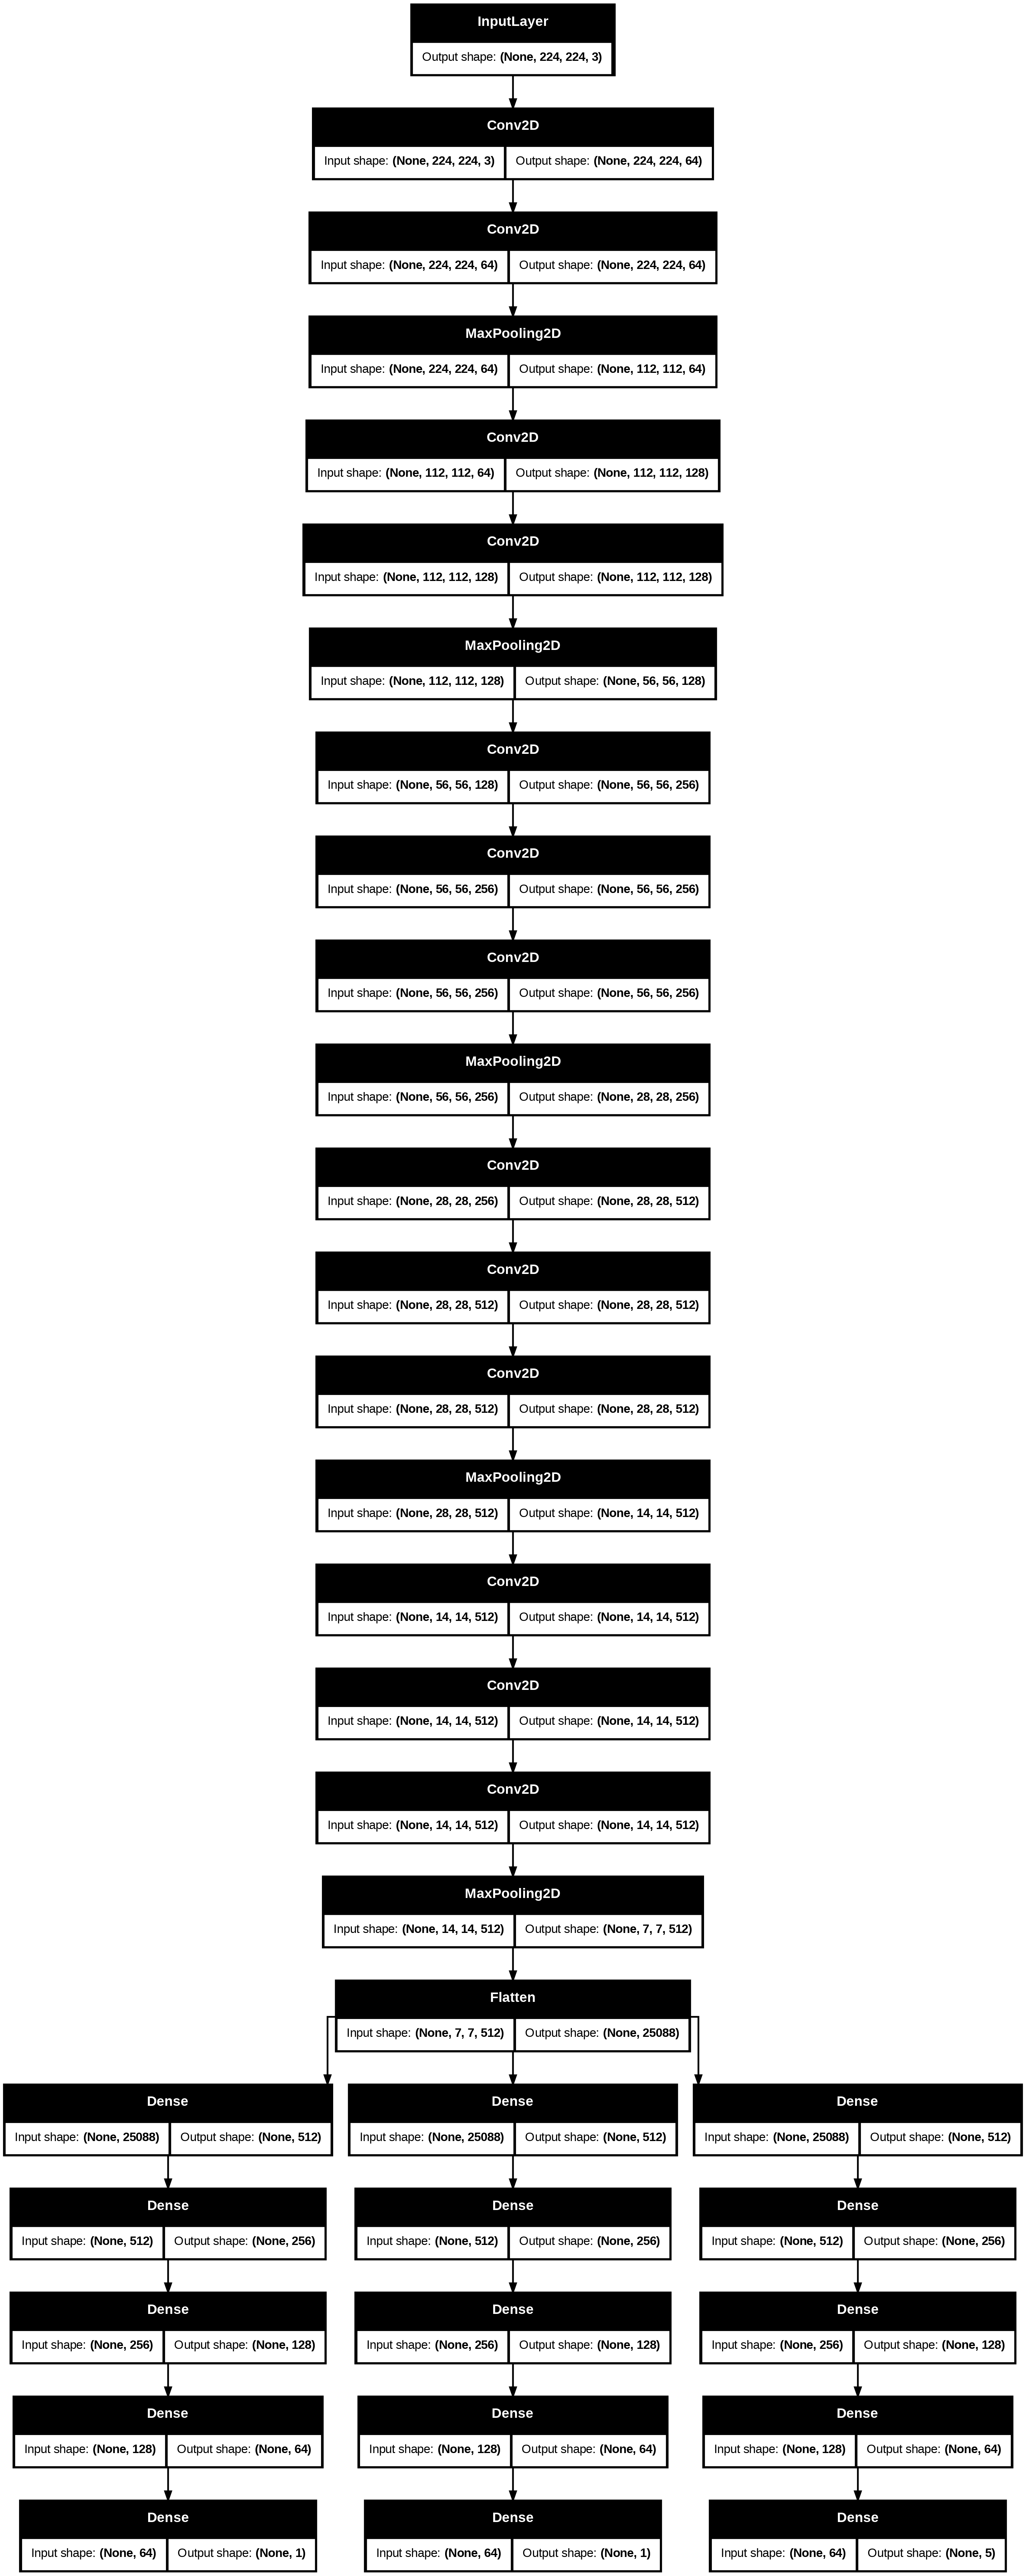

In [ ]:
plot_model(model,show_shapes=True)

# Model Training

In [ ]:
model.compile(
    optimizer=Adam(),
    loss={
        'age': MeanAbsoluteError(),  # Loss for age prediction (regression)
        'gender': BinaryCrossentropy(),  # Loss for gender prediction (binary classification)
        'ethnicity': SparseCategoricalCrossentropy()  # Loss for ethnicity prediction (multi-class classification with sparse labels)
    },
    loss_weights={
        'age': 1.0,  # Weight for age loss
        'gender': 1.0,  # Weight for gender loss
        'ethnicity': 1.0  # Weight for ethnicity loss
    },
    metrics={
        'age': [R2Score()],  # R2Score for regression on age
        'gender': [Accuracy()],  # Accuracy for gender classification
        'ethnicity': [Accuracy()]  # Accuracy for ethnicity classification
    }
)

# Ensure the EarlyStopping monitor is valid
call_back = EarlyStopping(monitor='val_accuracy', patience=3, restore_best_weights=True, verbose=1, min_delta=0.01)

# Train the model
history = model.fit(
    train_generator,
    epochs=50,
    batch_size=32,
    validation_data=val_data,
    callbacks=[call_back]
)


Epoch 1/50


ValueError: The shape of the target variable and the shape of the target value in `variable.assign(value)` must match. variable.shape=(1,), Received: value.shape=(3,). Target variable: <KerasVariable shape=(1,), dtype=float32, path=r2_score/sum>

# Check for Overfitting

In [ ]:
metrics_value = pd.DataFrame(history.history)
metrics_value.head()

# Prediction

In [ ]:
prediction = model.predict(val_data)

In [ ]:
prediction

In [ ]:
len(prediction)

In [ ]:
age_predicted = []
gender_predicted = []
ethnicity_predicted = []

for i in range(len(prediction[0])):
  age_predicted.append(prediction[0][i][0])

for i in range(len(prediction[1])):
  gender_predicted.append(prediction[1][i][0])

for i in range(len(prediction[2])):
  ethnicity_predicted.append(prediction[2][i][0])